In [16]:
import _thread, time, socket, json
import numpy as np
from IPython.display import clear_output

In [7]:
def imu_ctrl_main(threadName, delay):
    count = 0
    print("Thread starts: ", threadName)
    while count < 5:
        time.sleep(delay)
        count += 1
        print('imu')



In [8]:
def cv_main(threadName, delay):
    count = 0
    print("Thread starts: ", threadName)
    while count < 5:
        time.sleep(delay)
        count += 1
        print('cv')

In [10]:
try:
    _thread.start_new_thread(imu_ctrl_main, ("imu_ctrl_thread", 1, ))
    _thread.start_new_thread(cv_main, ("cv_thread", 2, ))
except:
    print("Error: to start thread")



Thread starts:  imu_ctrl_thread
Thread starts:  cv_thread
imu
cvimu

imu
imu
cv
imu
cv
cv
cv


In [ ]:
# + is forward, #- is backward
# + is left, #- is right
# + is anti clk, #- is clk,

# myRawPath = utct.rawPath()
# myRawPath.record(myUt.imu['pos'][0], myUt.imu['pos'][1], myUt.imu['rpy'][2])
# myRawPath.recordErr(0,0,ctrl_rs)
# myRawPath.setGloPos()

In [7]:
import unitree_sdk as utct
import numpy as np
import time
from IPython.display import clear_output

mySpLst = [] #List of position set point
#mySpLst.append(utct.setPoint(0.0, 0.0, 0.4*np.pi, maxRunCnt=200))
mySpLst.append(utct.setPoint(0.0, 0.0, 0.0*np.pi, maxRunCnt=200))
#mySpLst.append(utct.setPoint(0.0, 0.0,-0.4*np.pi, maxRunCnt=200))

myUt = utct.controller('192.168.123.162', 3114)

for mySp in mySpLst:
    for i in range(mySp.maxRunCnt):
        myUt.getState()
        ctrl_fs = 2*(mySp.x-myUt.imu['pos'][0]) 
        ctrl_ss = 3*(mySp.y-myUt.imu['pos'][1])
        ctrl_rs = 2*utct.roundYawCtrl(mySp.yaw-myUt.imu['rpy'][2])
        myUt.runSpeed(ctrl_fs, ctrl_ss, ctrl_rs)
        time.sleep(mySp.timeStep)
        clear_output(wait=True)
    x = input()
del myUt

(-5.0, 5.0)

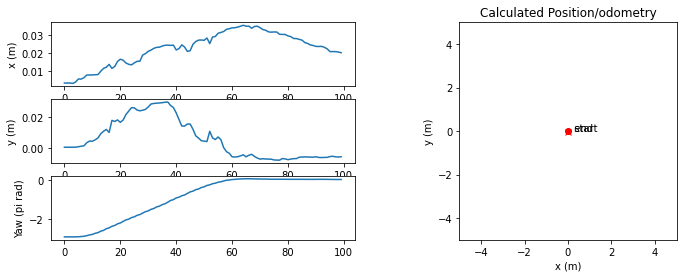

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.close('all')
fig = plt.figure(figsize=(12,4)) #constrained_layout=True
gs = fig.add_gridspec(3, 2)
ax=[]
ax.append(fig.add_subplot(gs[0, 0]))
ax.append(fig.add_subplot(gs[1, 0]))
ax.append(fig.add_subplot(gs[2, 0]))
ax.append(fig.add_subplot(gs[:, 1]))
thisAx = ax[0]
thisAx.plot(myRawPath.loc_x)
thisAx.set_ylabel('x (m)')
thisAx = ax[1]
thisAx.plot(myRawPath.loc_y)
thisAx.set_ylabel('y (m)')
thisAx = ax[2]
#thisAx.plot(np.divide(myRawPath.loc_yaw,np.pi))
thisAx.plot(np.divide(myRawPath.err_yaw,1))
thisAx.set_ylabel('Yaw (pi rad)')
thisAx = ax[3]
thisAx.plot(myRawPath.glo_x,myRawPath.glo_y)
thisAx.plot(myRawPath.glo_x[-1],myRawPath.glo_y[-1], 'rx')
thisAx.text(myRawPath.glo_x[-1],myRawPath.glo_y[-1], '  end')
thisAx.plot(myRawPath.glo_x[ 0],myRawPath.glo_y[ 0], 'ro')
thisAx.text(myRawPath.glo_x[ 0],myRawPath.glo_y[ 0], '  start')
thisAx.set_title("Calculated Position/odometry")
thisAx.set_xlabel('x (m)')
thisAx.set_ylabel('y (m)')
thisAx.set_aspect(1)
xlim=5
ylim=5
thisAx.set_xlim([-xlim,xlim])
thisAx.set_ylim([-ylim,ylim])

#fig.savefig("setpoint_xy7.png")

In [23]:
myCv = utcv.cvFindLine('http://192.168.123.12:8080/?action=stream')
while 1:
    clear_output(wait=True)
    sta=time.time()
    print(myCv.run(True))
    print(time.time()-sta)
    if myCv.exitCv():
        del myCv
        break

(24, 124)
0.05099964141845703


In [26]:
# CV-PID 

import unitree_sdk as utct
import numpy as np
import time
from IPython.display import clear_output
import unitree_cv as utcv

#mySpLst.append(utct.setPoint(0.0, 0.0,-0.4*np.pi, maxRunCnt=200))
mySpLst = [] #List of position set point
#mySpLst.append(utct.setPoint(0.0, 0.0, 0.4*np.pi, maxRunCnt=200))
mySpLst.append(utct.setPoint(0.0, 0.0, 0.0*np.pi, maxRunCnt=200))
    
def imu_ctrl_main(threadName, delay):
    global cvCenterErr, cvLineDistance, cvEnable
    myUt = utct.controller('192.168.123.162', 3114)

    for mySp in mySpLst:
        for i in range(mySp.maxRunCnt):
            print(cvCenterErr, cvLineDistance)
            myUt.getState()
            
            if cvEnable==True:
                ctrl_fs = 0.1*(cvLineDistance-400)#2*(mySp.x-myUt.imu['pos'][0]) 
                ctrl_ss = cvCenterErr/800
                ctrl_rs = 2*utct.roundYawCtrl(mySp.yaw-myUt.imu['rpy'][2])
            else:
                ctrl_fs = 2*(mySp.x-myUt.imu['pos'][0]) 
                ctrl_ss = 3*(mySp.y-myUt.imu['pos'][1])
                ctrl_rs = 2*utct.roundYawCtrl(mySp.yaw-myUt.imu['rpy'][2])
            myUt.runSpeed(ctrl_fs, ctrl_ss, ctrl_rs)
            time.sleep(mySp.timeStep)
            clear_output(wait=True)
    del myUt
    isCtrlEnd=True
    print(threadName, 'end', isCtrlEnd)

In [25]:
def cv_main(threadName, delay):
    global cvCenterErr, cvLineDistance, isCtrlEnd
    myCv = utcv.cvFindLine('http://192.168.123.12:8080/?action=stream')
    while 1:
        clear_output(wait=True)
        print(isCtrlEnd)
        cvCenterErr, cvLineDistance = myCv.run(True)
        if myCv.exitCv() or (isCtrlEnd==True): 
            del myCv
            print(threadName, 'end')
            break

In [27]:
import _thread, time, socket, json
cvCenterErr, cvLineDistance = 0,800
isCtrlEnd = False
cvEnable = True
_thread.start_new_thread(imu_ctrl_main, ("imu_ctrl_thread", 1))
_thread.start_new_thread(cv_main, ("cv_thread", 2, ))

# try:
#     _thread.start_new_thread(imu_ctrl_main, ("imu_ctrl_thread", 1))
#     #_thread.start_new_thread(cv_main, ("cv_thread", 2, ))
# except:
#     print("Error: to start thread")



False
cv_thread end
